# Import Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Dataset and data preprocessing 

In [2]:
df_observation = pd.read_csv('data/Telco-customer-churn.csv')


In [3]:
df_observation.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   Zip Code          7043 non-null   int64  
 6   Lat Long          7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  Phone Service     7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [5]:
df_observation.describe()

,Count,Zip Code,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000



1. CustomerID: A unique ID that identifies each customer.
2. Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.
3. Gender: The customer’s gender: Male, Female
4. CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
5. Senior Citizen: Indicates if the customer is 65 or older: Yes, No
6. Married: Indicates if the customer is married: Yes, No
7. Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
8. Number of Dependents: Indicates the number of dependents that live with the customer.
9. Country: The country of the customer’s primary residence.
10. State: The state of the customer’s primary residence.
11. City: The city of the customer’s primary residence.
12. Zip Code: The zip code of the customer’s primary residence.
13. Lat Long: The combined latitude and longitude of the customer’s primary residence.
14. Latitude: The latitude of the customer’s primary residence.
15. Longitude: The longitude of the customer’s primary residence.
16. Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.
17. Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No
18. Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
19. Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
20. Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
21. Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
22. Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
23. Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
24. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.
25. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
26. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
27. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No
28. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
29. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
30. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
31. Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
32. Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
33. Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
34. Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.


CustomerID           0.000000
Count                0.000000
Country              0.000000
State                0.000000
City                 0.000000
Zip Code             0.000000
Lat Long             0.000000
Latitude             0.000000
Longitude            0.000000
Gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
TenureMonths         0.000000
Phone Service        0.000000
MultipleLines        0.000000
InternetService      0.000000
OnlineSecurity       0.000000
OnlineBackup         0.000000
DeviceProtection     0.000000
TechSupport          0.000000
StreamingTV          0.000000
StreamingMovies      0.000000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
ChurnLabel           0.000000
ChurnValue           0.000000
ChurnScore           0.000000
CLTV                 0.000000
ChurnReason         73.463013
dtype: flo

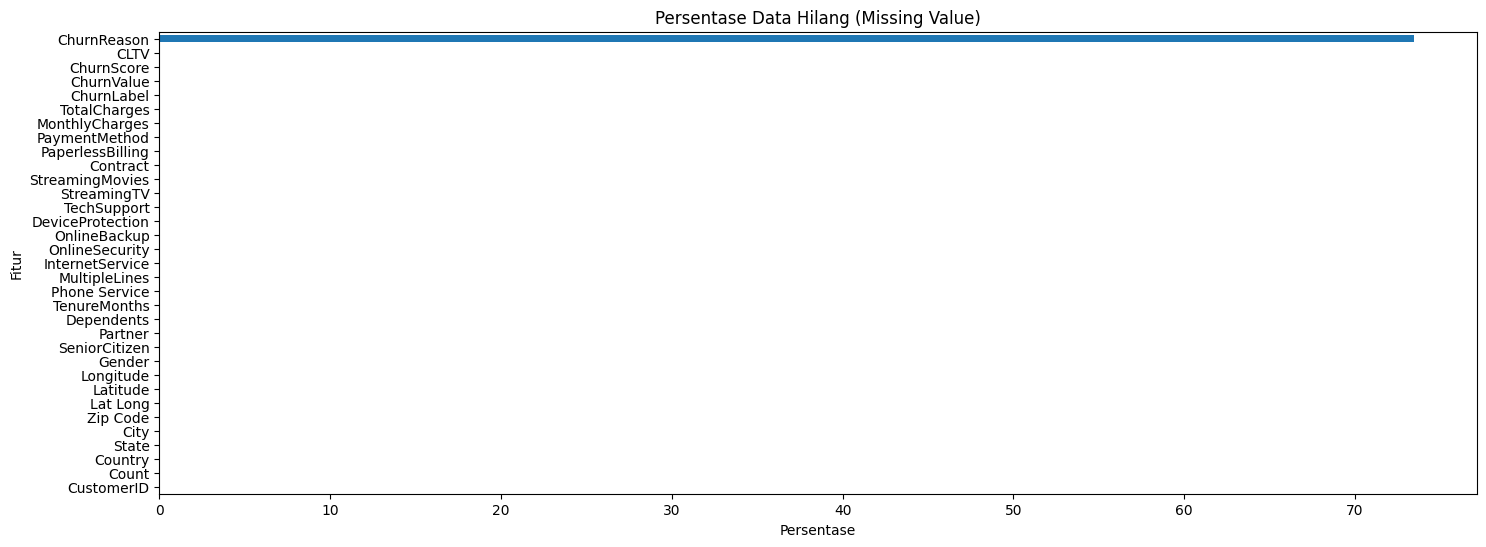

In [5]:
display(df_observation.isna().sum()/len(df_observation)*100)
(df_observation.isna().sum()/len(df_observation)*100).plot(kind = 'barh', figsize = (17,6));
plt.title('Persentase Data Hilang (Missing Value)')
plt.xlabel('Persentase')
plt.ylabel('Fitur')
plt.show()

In [6]:
'''
Delete some data that doesn't use in this process, this feature are just have processed from data resource which is IBM 
'''
df_observation.drop(columns=['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','ChurnValue','ChurnReason','CLTV','ChurnScore'], inplace=True, axis=1)

## Imputasi Data

In [7]:
# change 'Total Charge' feature type to numeric 
df_observation['TotalCharges'] = pd.to_numeric(df_observation['TotalCharges'], errors='coerce')

In [8]:
# after identifying the dataset, that prove 'Total Charges' feature have a relation with 
# 'Tenure Months' and 'Monthly Charges' feature 
df_observation['TotalCharges'].fillna(0, inplace=True) #fill the Nan data with 0 value

In [9]:
# Jumlah data untuk dilakukan percobaan
print('Shape of Dataframe : ', df_observation.shape)

Shape of Dataframe :  (7043, 20)


## Data Observation

In [10]:
def summarize_categoricals(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Nominal', 'Jumlah Katogorikal', 'Jumlah data hilang'])
    df_temp.index.name = 'Fitur'
    return df_temp.iloc[:, 0 if show_levels else 1:]


def find_categorical(df, cutoff=10):
    """
        Function to find categorical columns in the dataframe.
    """
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) <= cutoff:
            cat_cols.append(col)
    return cat_cols


def to_categorical(columns, df):
    """
        Converts the columns passed in `columns` to categorical datatype
    """
    for col in columns:
        df[col] = df[col].astype('category')
    return df

In [11]:
#Separate the data type of dataset for easily dataset identification 
categoricals_pratinjau = find_categorical(df_observation, cutoff=5)
res = summarize_categoricals(df_observation[categoricals_pratinjau], show_levels=True)

In [12]:
df_observation['ChurnValue'].value_counts()

ChurnValue
0    5174
1    1869
Name: count, dtype: int64

In [13]:
df_observation['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [14]:
numericals_pratinjau = list(set(df_observation.columns.tolist()) - set(categoricals_pratinjau)) + list(set(categoricals_pratinjau) - set(df_observation.columns.tolist()))
numericals_pratinjau

['TotalCharges', 'TenureMonths', 'MonthlyCharges']

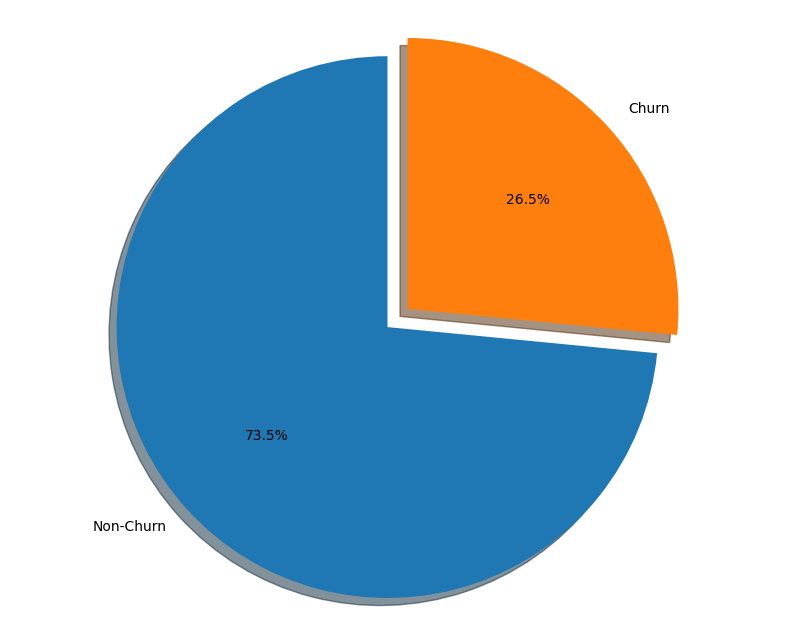

In [15]:
labels = 'Non-Churn', 'Churn'
sizes = [df_observation['ChurnValue'][df_observation['ChurnValue']==0].count(), df_observation['ChurnValue'][df_observation['ChurnValue']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
#plt.title("Proporsi Antara Pelanggan 'Churn' dan Tidak pada Dataset", size = 20)
plt.savefig("Proportion of customer churned and retained original.png")
plt.show();

Dari visualisasi *pie chart* diperoleh informasi bahwa kelas data atau target mengalami ketidakseimbangan.

In [16]:
df_observation[df_observation['ChurnValue']==1]['PaperlessBilling'].value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [17]:
df_observation[df_observation['ChurnValue']==1]['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

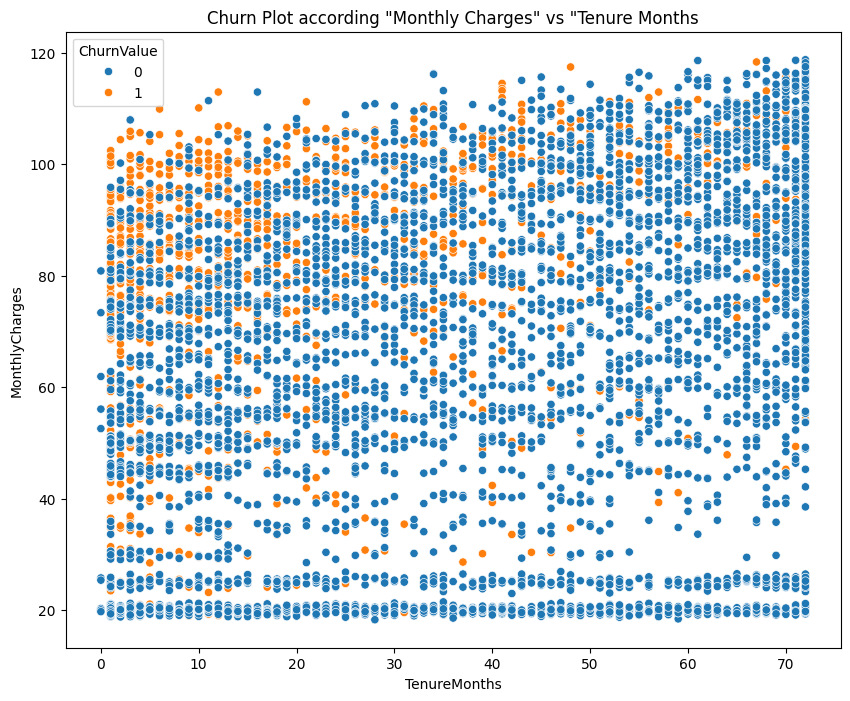

In [18]:
plt.figure(figsize=(10,8))
plt.title('Churn Plot according "Monthly Charges" vs "Tenure Months')
sns.scatterplot(x='TenureMonths',y='MonthlyCharges',data=df_observation,hue='ChurnValue')
plt.show()

From the *scatter plot* between the "Tenure Months" and "Monthly Charges" features, information is obtained that customers who leave the provider's service are customers who pay monthly bills of more than or equal to $80, as seen in the distribution pattern of blue circles which are collected more in larger areas, from 80. Then, orange area have distribution around all tenure months (0 - 75) but the focus in the range 0 -10, the insight from this plot is the customer maybe feeling reluctnace with overpayed the charges. 

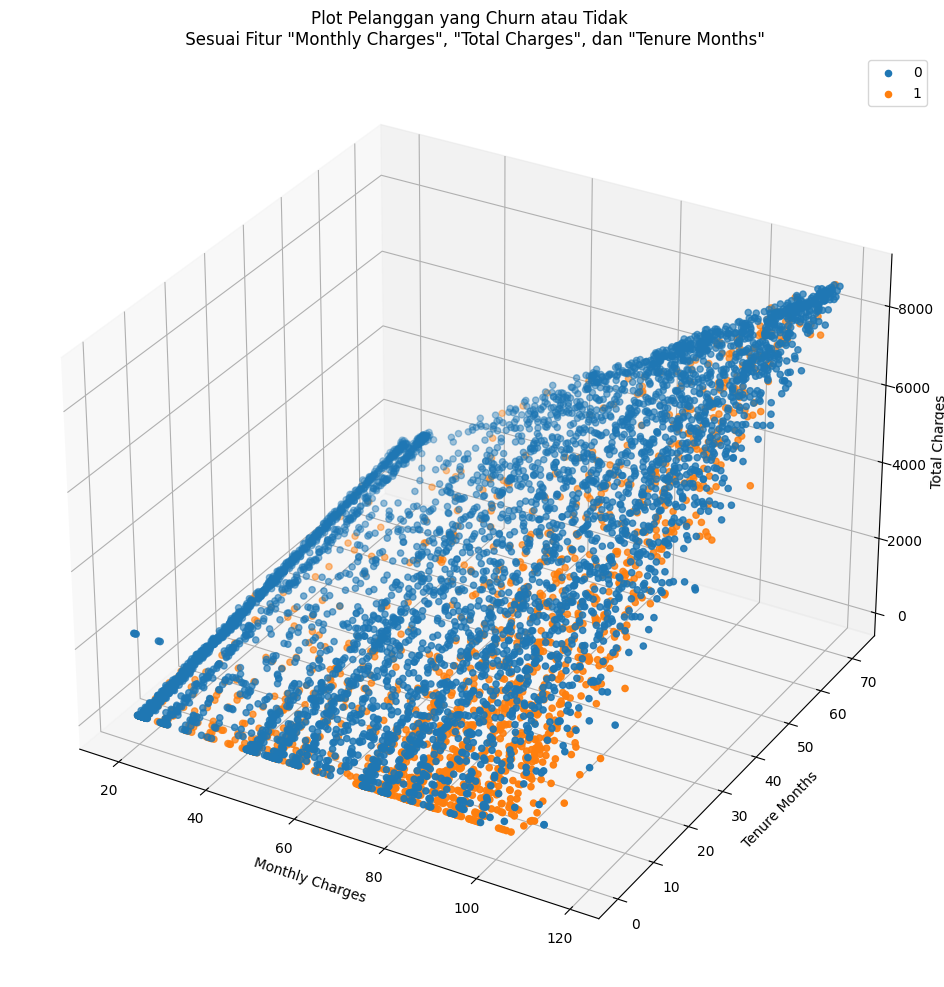

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
plt.title('Plot Pelanggan yang Churn atau Tidak \n Sesuai Fitur "Monthly Charges", "Total Charges", dan "Tenure Months"')
for c in [0,1]: #df_observation.ChurnValue.unique():
  ax.scatter(df_observation.MonthlyCharges[df_observation.ChurnValue==c],df_observation.TenureMonths[df_observation.ChurnValue==c],df_observation.TotalCharges[df_observation.ChurnValue==c], label=c)
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Tenure Months')
ax.set_zlabel('Total Charges')
ax.legend()

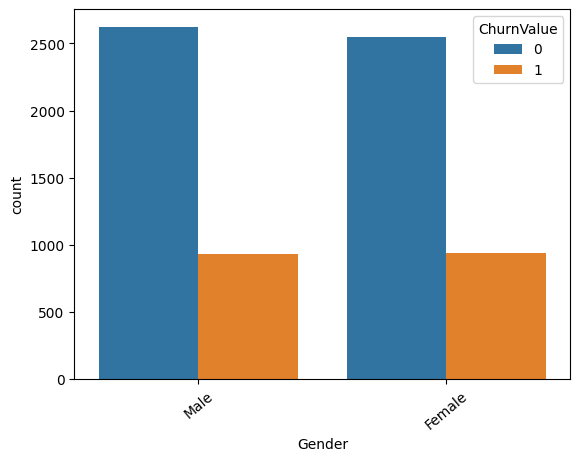

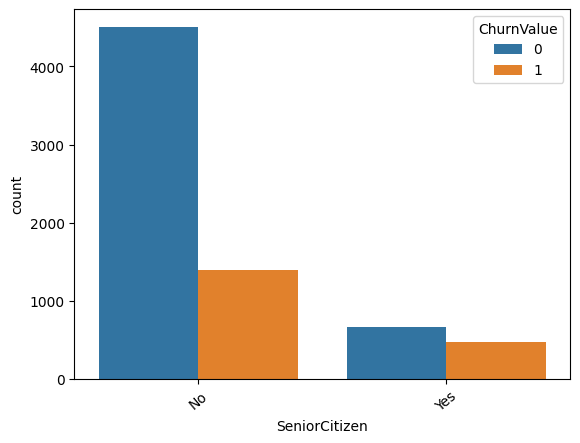

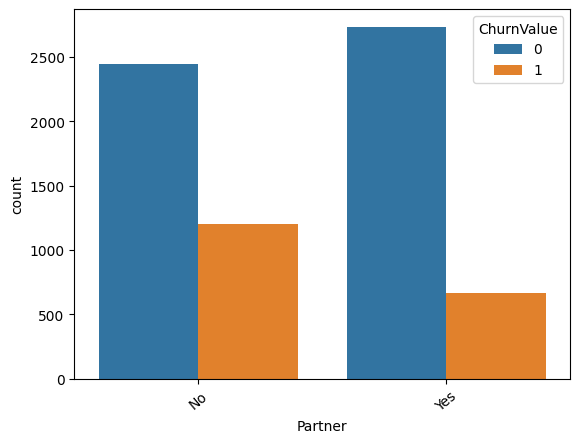

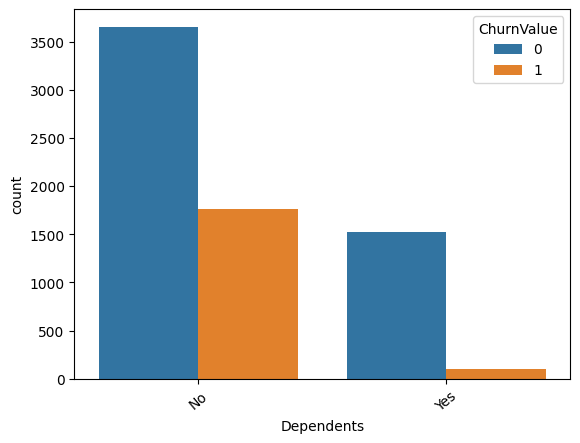

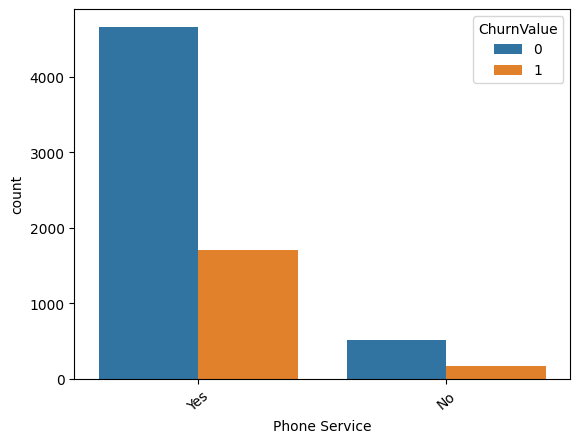

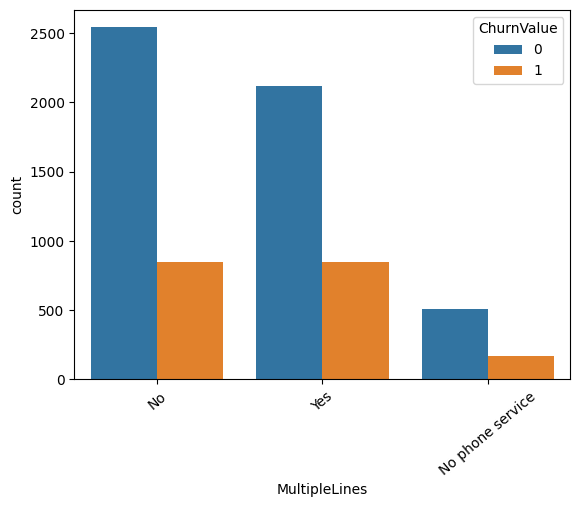

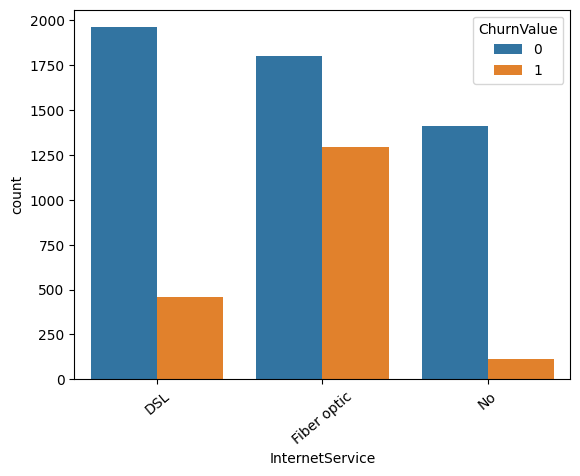

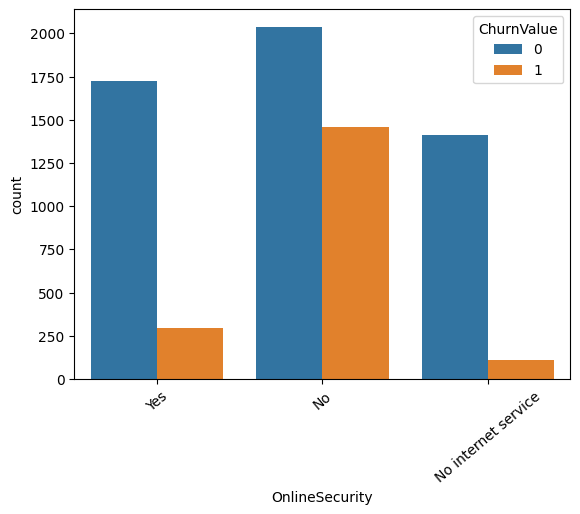

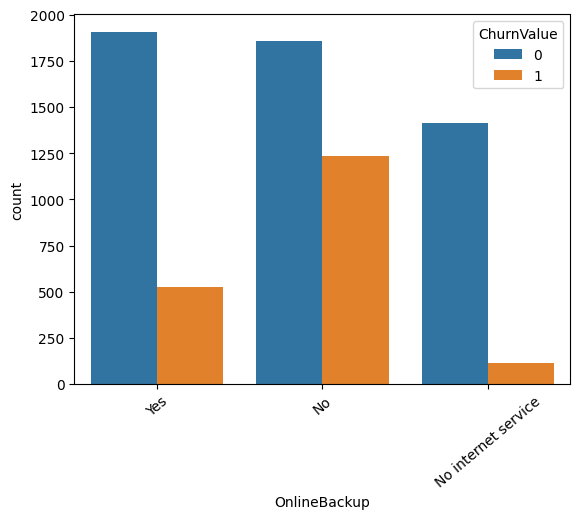

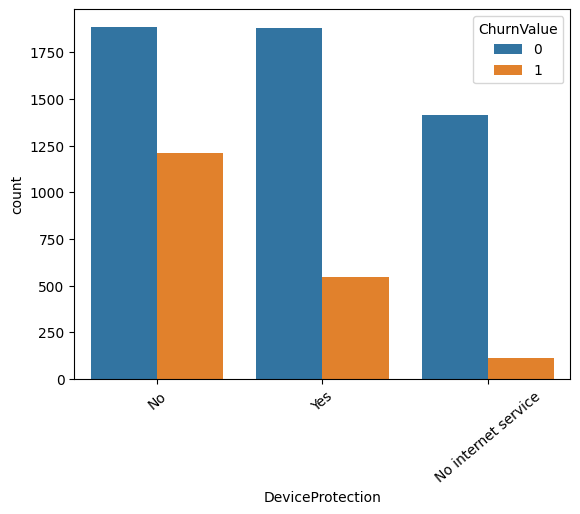

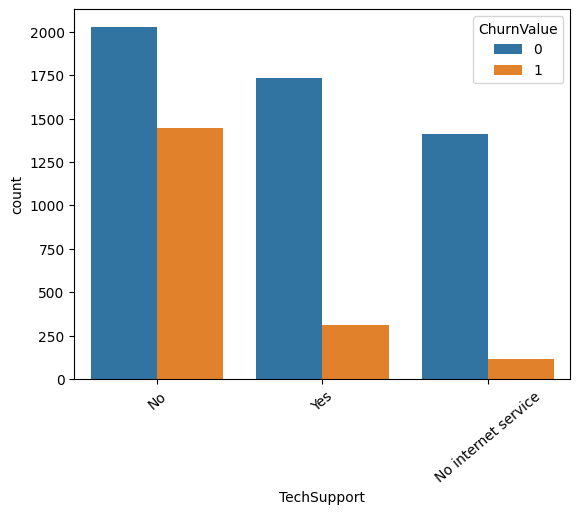

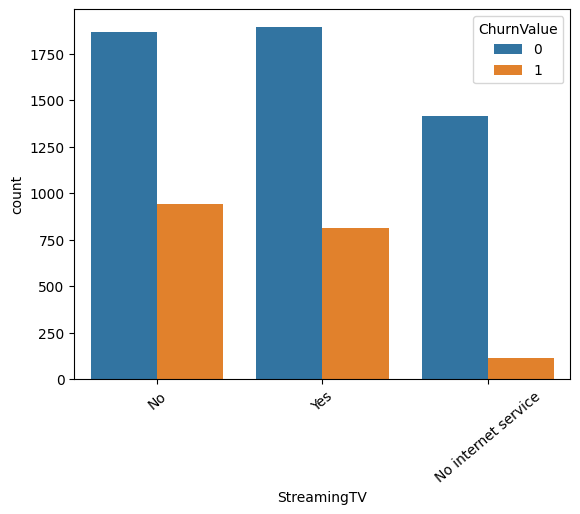

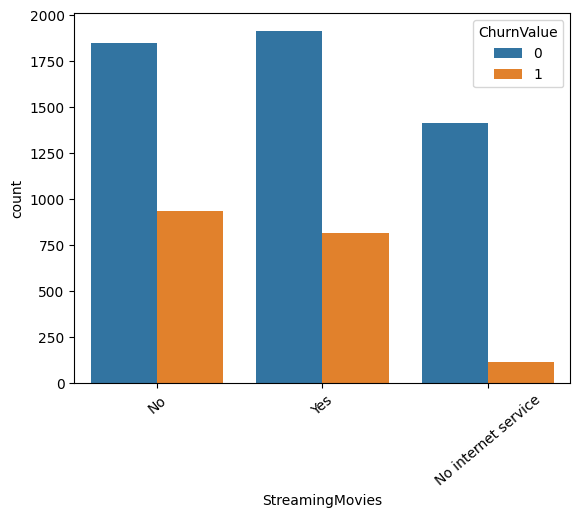

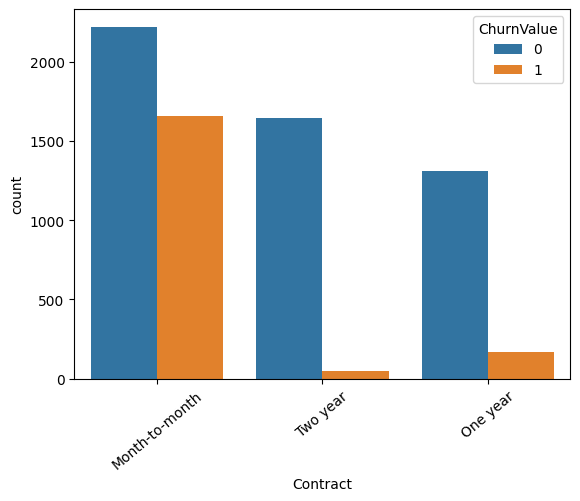

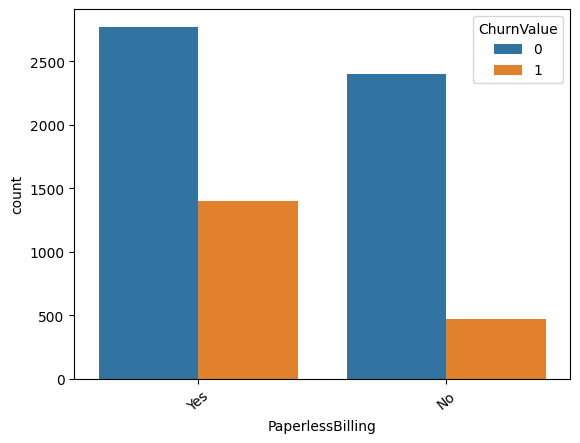

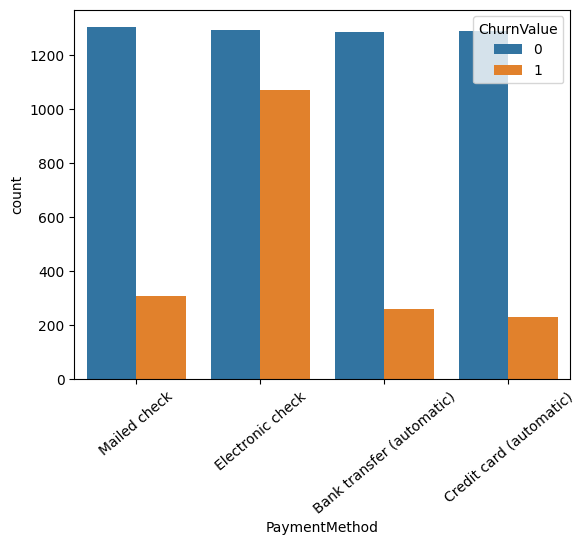

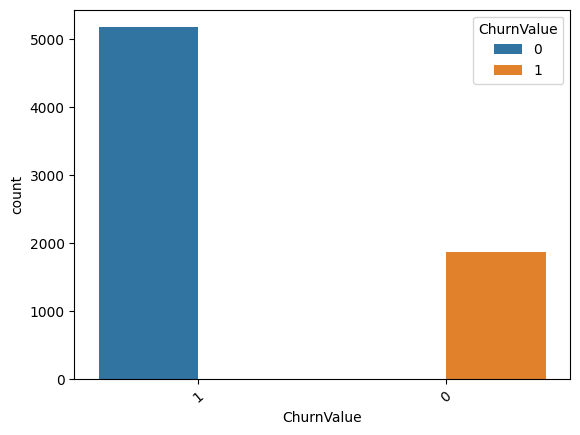

In [ ]:
for col in categoricals_pratinjau:
  plt.figure()
  sns.countplot(x=col,hue='ChurnValue',data=df_observation)\
  .set_xticklabels(df_observation[col].unique().tolist(), rotation=40)
  plt.show

Kumpulan grafik hitung di atas merupakan grafik hitung dari semua fitur yang bersifat kategorikal pada dataset, akan terlihat jumlah proporsi pelanggan yang meninggalkan layanan (churn) atau tidak pada setiap fitur kategorik.

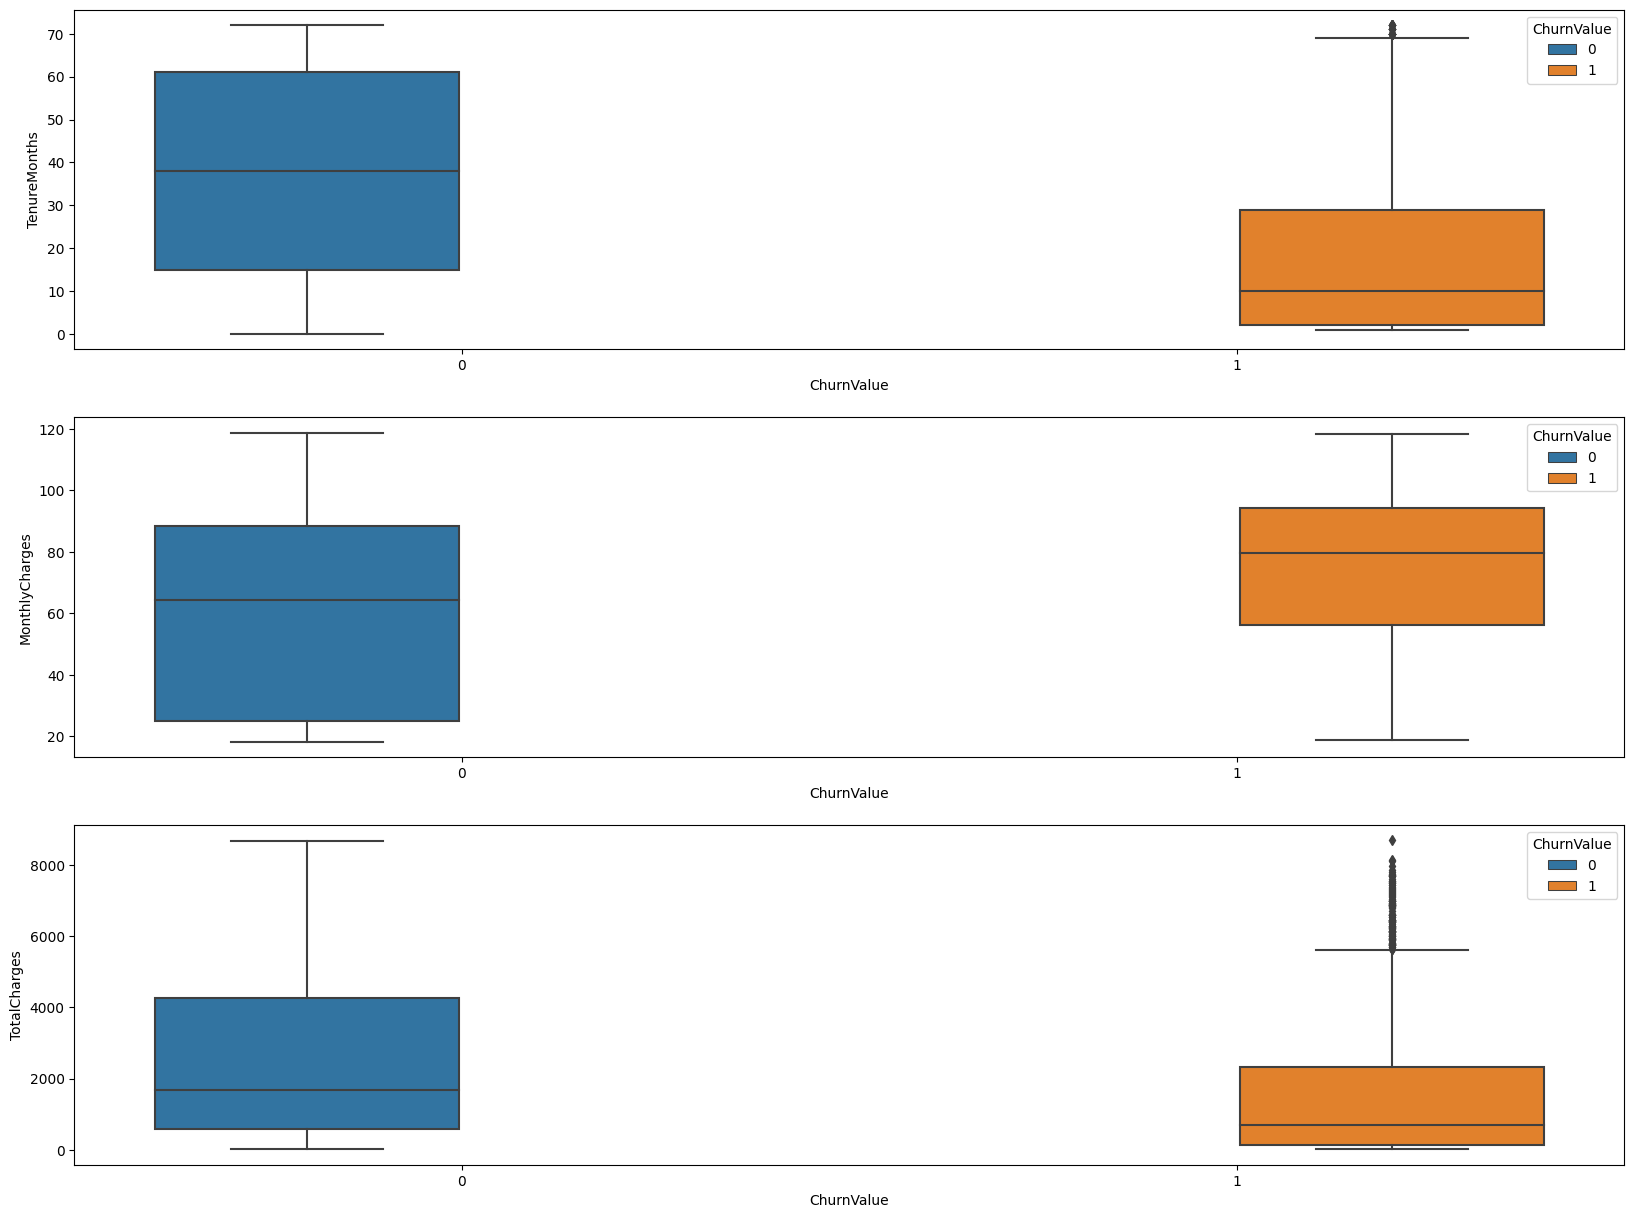

In [ ]:
fig, axarr = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(y='TenureMonths',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation, ax=axarr[0])
sns.boxplot(y='MonthlyCharges',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation , ax=axarr[1])
sns.boxplot(y='TotalCharges',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation , ax=axarr[2])
plt.savefig('Boxplot numeric feature churn label.png')
plt.show();

In [25]:
df_observation.describe().T

,count,mean,std,min,25%,50%,75%,max
TenureMonths,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
ChurnValue,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


In [20]:
#Dataframe with "yes" class in "churn label" feature
label_yes = df_observation[df_observation['ChurnValue']==1]
label_yes

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,Phone Service,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,Male,No,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,1
1865,Female,No,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,1
1866,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1
1867,Female,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1


In [27]:
label_yes.describe().T

,count,mean,std,min,25%,50%,75%,max
TenureMonths,1869.0,17.979133,19.531123,1.00,2.00,10.00,29.0,72.00
MonthlyCharges,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.2,118.35
TotalCharges,1869.0,1531.796094,1890.822994,18.85,134.50,703.55,2331.3,8684.80
ChurnValue,1869.0,1.000000,0.000000,1.00,1.00,1.00,1.0,1.00


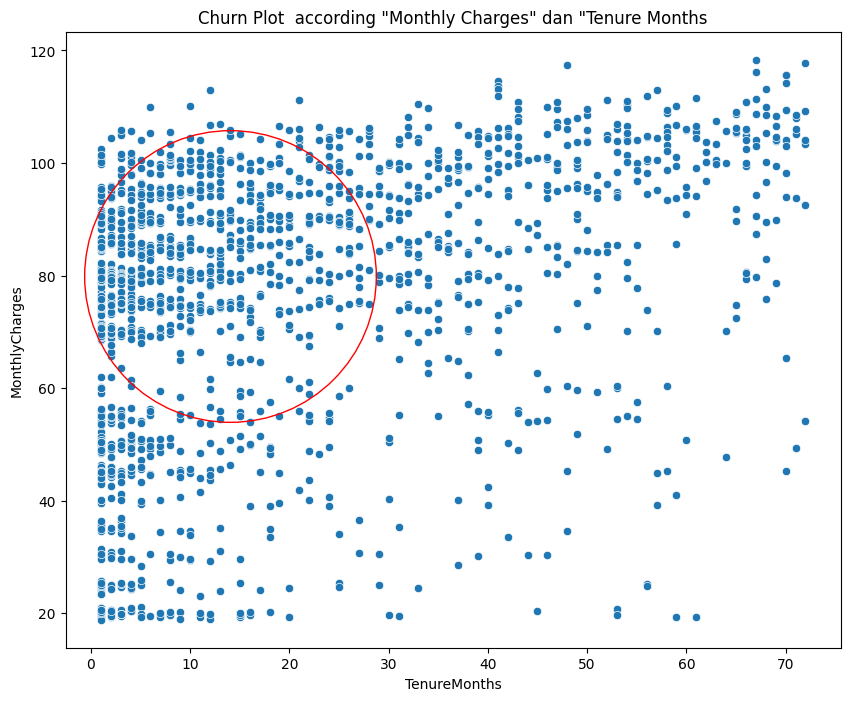

In [21]:
circle1 = plt.Circle(xy=(0, 0), radius=2, color='red', fill=False)
plt.figure(figsize=(10,8))
plt.title('Churn Plot  according "Monthly Charges" dan "Tenure Months')
a = sns.scatterplot(x='TenureMonths',y='MonthlyCharges',data=label_yes)
a.plot([14],[80],'o',ms=210,mec='r',mfc='none')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18736\2190008628.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])


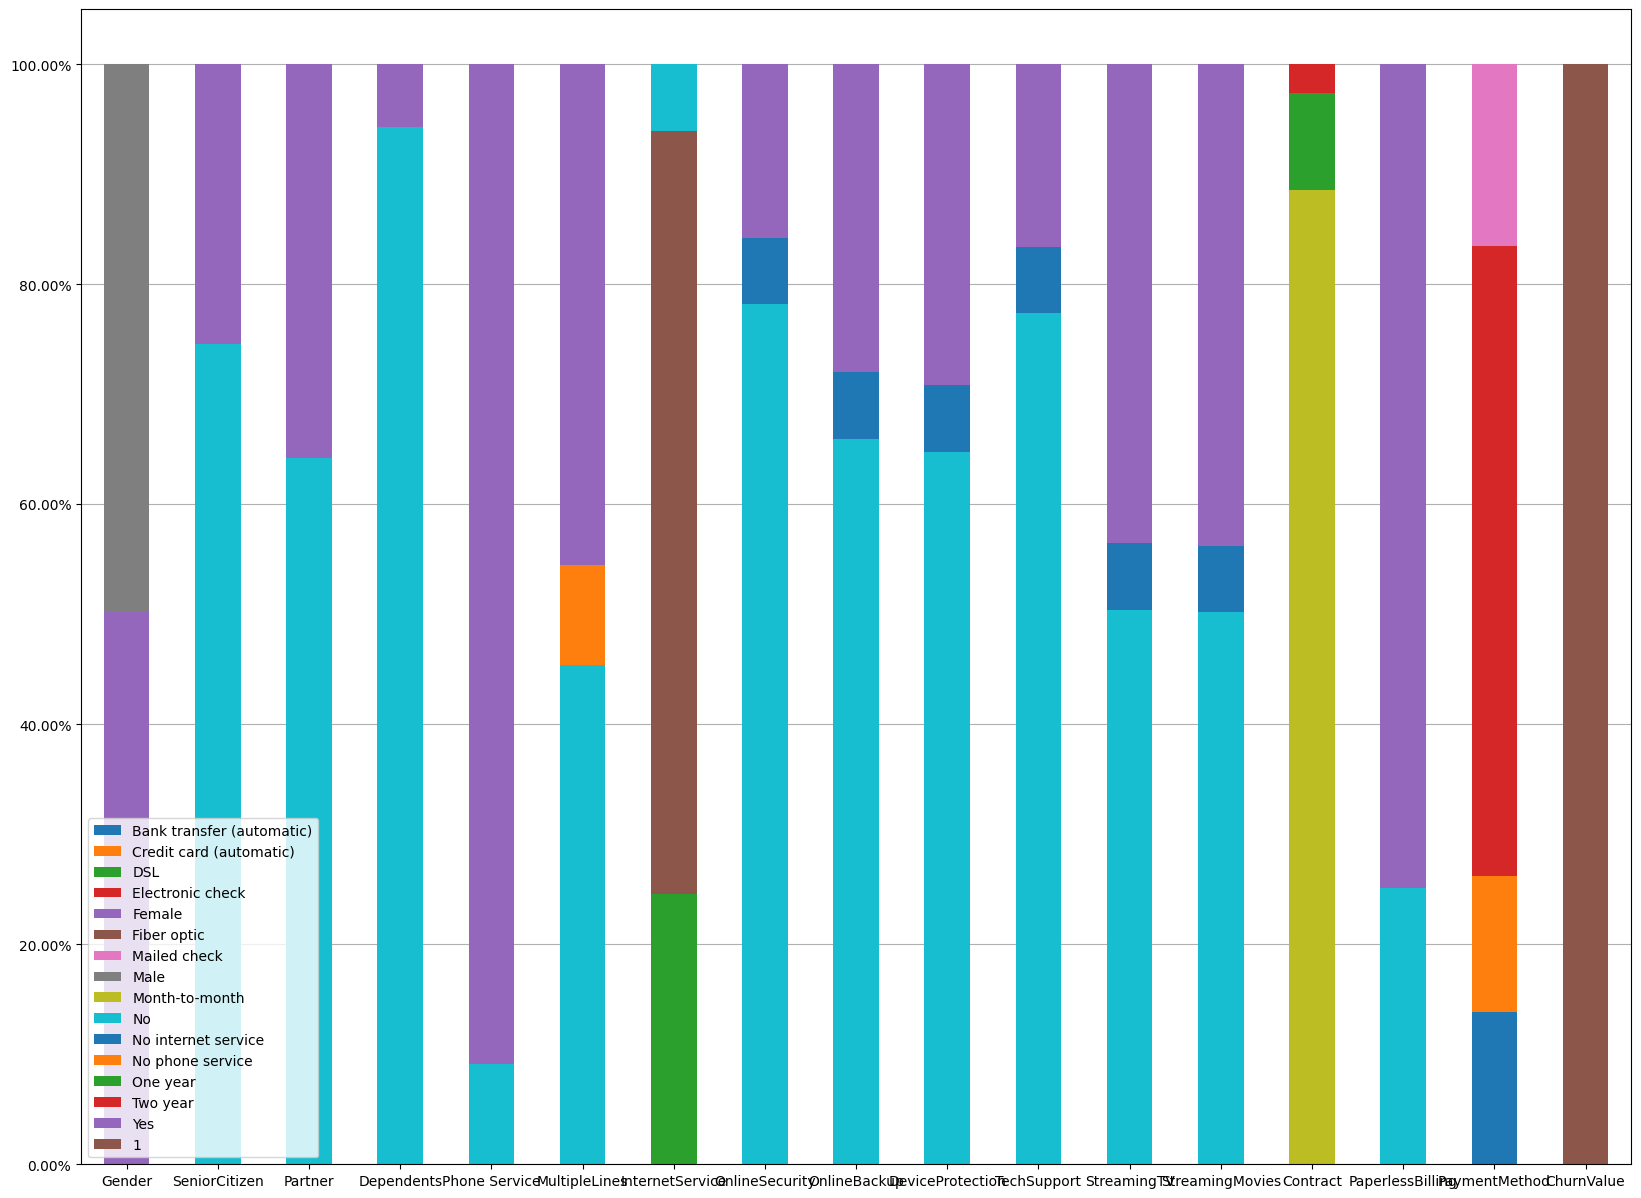

In [22]:
counts = label_yes[categoricals_pratinjau].apply(lambda x: x.value_counts() / len(x)).transpose()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
counts.plot(ax=ax,kind='bar', stacked=True, rot=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.show()

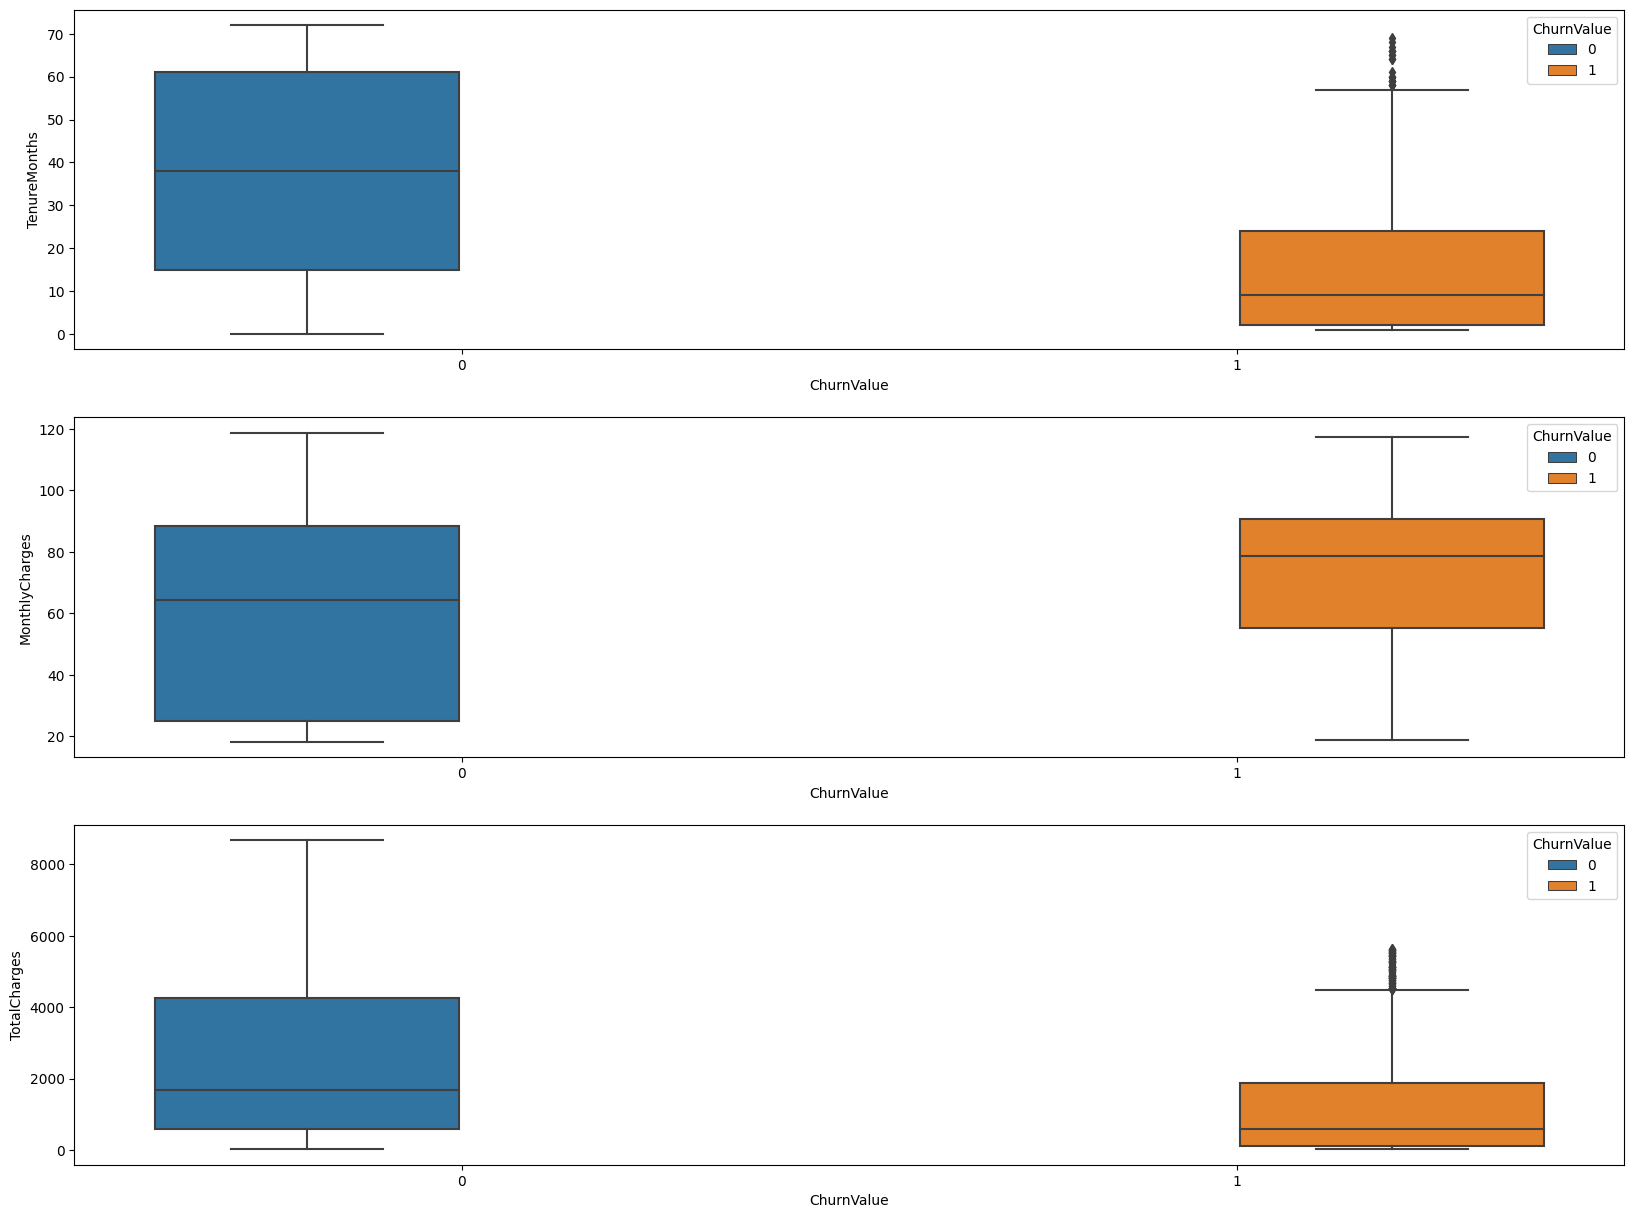

In [78]:
fig, axarr = plt.subplots(3, 1, figsize=(20, 15))
sns.boxplot(y='TenureMonths',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation, ax=axarr[0])
sns.boxplot(y='MonthlyCharges',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation , ax=axarr[1])
sns.boxplot(y='TotalCharges',x = 'ChurnValue', hue = 'ChurnValue', data = df_observation , ax=axarr[2])
plt.savefig('Boxplot numeric feature churn label.png')
plt.show();

# Data Preprocessing 